## 1.  Density Matrix

### 1.1 Definetion

If you have an ensample of particles with different states $\{\psi_i\}$ with probabilities $\{P_i\}$, one informative thing you want to know about this system is the **density matrix**:
$$	\label{density}
	\rho = \sum_{i}P_i  | \psi_i \rangle \langle\psi|
$$
This is informative because all observable depend on the Bras and Kets of the states and you will see how far it is informative in a minute<br />
\
**Definiton**: $\rho$ is a density matrix if $tr(\rho)=1$ and $\rho$ is Positive Semi Definite (**PSD**) ($\rho \geq 0 $)
	For $\rho$ to be Positive Semi Definite, it have to: 
* Be hermition Hermition $\rho^{\dagger}=\rho$.
* Satisfy one of these equivlent conditions:
    + $Eignvalues \geq 0$
    + Expectation values are non-negative for all states. 
        $\langle X| \rho | X \rangle \geq 0 \;\;\; ;\;\;\; \forall \; \; \; |X \rangle$
        
      +can be factorized as $\rho = A^{\dagger}A$

and we can use Python to check if a matrix can be Density matrix or not. 

In [1]:
# first lets import used module
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', '')))

import QuGraphy as qg

In [2]:
import numpy as np

In [3]:
mA=[[1/2 , 1/2]
   ,[1/2, 1/2]]
mB=[[1,1]
   ,[1,0]]
a=qg.is_density(mA)
b=qg.is_density(mB)
print("Is Matrix mA density matrix?",str(a))
print("Is Matrix mb is density matrix?",str(b))

Is Matrix mA density matrix? True
Is Matrix mb is density matrix? False


### 1.2 Special cases

####  Pure States :

pure states have $P_1=1$ for some state $|\psi\rangle$ then $$\rho=|\psi\rangle \langle\psi|$$

we can check that the given system is pure easly, as you ca see that the density matrix satisfies $tr(\rho^2)=1$ only if it was a purre state.

here we check system A which have state $|+\rangle$ with probability 1, and another system B which have state $|0\rangle$ with probability 1/2 and state $|1\rangle$ with probability 1/2.

In [4]:
mA=[[1/2 , 1/2]
   ,[1/2, 1/2]]
mC=[[1/2 , 0]
   ,[0, 1/2]]
print("is matrix mA pure? ",str(qg.is_pure(mA)))
print("is matrix mB pure? ",str(qg.is_pure(mC)))

is matrix mA pure?  True
is matrix mB pure?  False


#### Probability Distribution:
for a classical system that has distinguashable outputs, we can consider them as orthogonal bases (no superposition).

\\ so we have ensample ${(P_1,|1\rangle),(P_2,|2\rangle),...,(P_d,|d\rangle)}$, then its density matrix will be $$\rho = \sum_{x}^{d} P_i  | x \rangle \langle x|$$
and as {$|x\langle$} is orthogonal set then the density matrix will be:
	
$$ \rho =
	\begin{bmatrix}
	P_{1} &        &          &       \\
	         & P_2 &          &       \\
	         &        &\ddots&        \\
	&      &        &           & P_{d}
	\end{bmatrix}
$$
	Notice that, this gently agree with the definiton of density matrices: $tr(\rho)\geq0 , \;\;\lambda_x \geq 0$
	

### 1.3 Quantum Operations

if we consider that this universe contains one quantum state then it will evolve in time by applying unitary operations.
$$
|\psi\rangle \rightarrow U|\psi\rangle
\\
\rho=|\psi\rangle \langle\psi| \rightarrow U|\psi\rangle \langle\psi| U^{\dagger}=U \rho U^{\dagger}
$$
for U is unitary.

But in reality you will not study the universe as one state. instead, you focus on your experiment, then you may add another system from outside (or forced to), discard one of your system, some decoherance or state collapse happen, or applying some random or fault unitaries.
\
Hence, we will introduce some general equivlent forms of quantum operations.

#### 1.3.1 Quantum Operation Form 1: Isometries + Partial trace (Stinespring)

Any quantum opereation can be a composite of Unitaries, adding systems, and partial trace (discarding parts of the system).
\
\
**Definition**: **Isometries**: isometry V is an operation the maps systems of dimension $d_A$ to dimension $d_B$ such that $d_B \geq d_A$ and $V^{\dagger}V=I$ (preserve lengths).
\
Non-formally speaking, you can consider it as non-square unitaries, and this can represent both applying unitaries and adding systems.

$$
  |\psi\rangle \xrightarrow{Isometry} V|\psi\rangle \; ; \;\;\; With\;\;\; \lVert V|\psi\rangle \rVert = \lVert |\psi\rangle \rVert
  $$

$$
  \rho \xrightarrow{Isometry} V \rho V^{\dagger} 
  $$

**Definition**: **Partial Trace**: Partial trace is discarding one of system qubits focusing on the others. It can be done by geting the density matrix of the given system and trace the subsystem we want to discard out.
\
for $\rho_{AB}=\alpha |a_1 b_1 \rangle \langle a_2 b_2| + \beta |a_3 b_3 \rangle \langle a_4 b_4|$
$$
tr_B(\rho_{AB})  =\rho_A=tr_B(\alpha |a_1 b_1 \rangle \langle a_2 b_2| + \beta |a_3 b_3 \rangle \langle a_4 b_4|)
\\
=\alpha |a_1 \rangle \langle a_2| tr(|b_1 \rangle \langle b_2|) +\beta |a_3 \rangle \langle a_4| tr(| b_4 \rangle \langle b_3|)
\\
=\alpha |a_1 \rangle \langle a_2| \langle b_1 | b_2 \rangle+\beta |a_3 \rangle \langle a_4| \langle b_3 | b_4\rangle
 $$

Also, we can consider the partial trace as having the residual state for each given measurement output of the discarded state.

**Example:** given $|\psi \rangle_{AB}=\frac{1}{\sqrt{3}}(|00\rangle+|01\rangle+|11\rangle)$

| Measuring Qubit A outcome | With probability | -------------Risidual B-------------------- |
|---------------------------|------------------|---------------------------------------------|
|             0             | $\frac{2}{3}$    | $\frac{1}{\sqrt{2}}(\|0\rangle +\|1\rangle)$ |
| 1                         | $\frac{1}{3}$    | $\|0\rangle $                               |


Now, if you have only access to system B, then you have ensample $\{(|+ \rangle), \frac{2}{3}), (|0 \rangle), \frac{1}{3})\}$.

we can make a Python code to do this job for us:

In [14]:
#first define basis
s0=[1,0] #|0>
s1=[0,1] #|1>
psi=(1/(np.sqrt(3)))*(np.kron(s0,s0)+np.kron(s0,s1)+np.kron(s1,s1))   #|psi>=(1/sqrt(3))(|00>+|01>+|11>)
#finally we trace out the first qubit
tr_A=qg.trace_out(psi,1)
print("the reduced B denstiy matrix is: \n", tr_A)

the reduced B denstiy matrix is: 
 [[0.33333333 0.33333333]
 [0.33333333 0.66666667]]


Now, from these two definition we can say that any quantum operation can be represented as an Isometry followed by tracing out.
$$
\rho \xrightarrow{operation} \mathcal{N}(\rho)=tr_E(V \rho V^{\dagger} )
$$

**Example:** Assume we started with state $|\psi \rangle_A$ then it moves in a channel which causes a bit flip (X operation) with probability P. So, $\rho_A=(1-P)|\psi \rangle_A \langle \psi|_A + (1-P)|\psi \rangle_A \langle \psi|_A$.
\
But this is mixed state, then it should be a part of some system (after channel effect), we can use what is called purification to deal with a mixed system as a part of pure system, the easiest thing in our case is:
$$
|\psi\rangle_{AE}=\sqrt(P-1) |\psi \rangle_A |0 \rangle_E + \sqrt(P) |\psi \rangle_A |1 \rangle_E
$$
and this is the operation that our channel do! 
\
This is the same as applying Isometry V:
$$
V=
	\begin{bmatrix}
	\sqrt(1-P) &   0        \\
	     0     & \sqrt(P)   \\
	     0     & \sqrt(1-P) \\
	   \sqrt(P)   &     0 
	\end{bmatrix}
  $$

We can discard the system E by tracing it out.

to have a good understand of what this channel do we may use a Python code to visualize each step on the density matrix for given $|\psi \rangle= |0 \rangle$ and bit flip probability P=0.2 .

In [4]:
#initial state
psi0=[1,0]
rho0= qg.density(psi0)

#isometric
v=[
    [np.sqrt(1-0.2), 0],
    [0 ,  np.sqrt(0.2)],
    [0, np.sqrt(1-0.2)],
    [np.sqrt(0.2) ,  0]
]
#Isometric effect
psi1=np.dot(v,psi0)
rho1=qg.density(psi1)

#discarding qubits out of focus
rho2=qg.trace_out(rho1,2)

/Users/shehabeldin/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.canvas.print_figure(bytes_io, **kw)


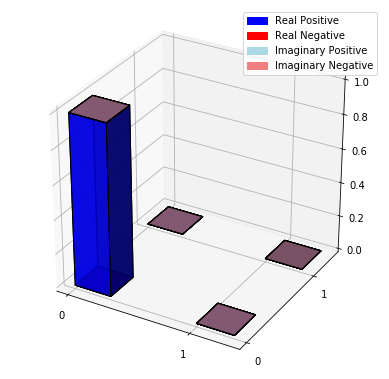

In [5]:
#visualize initial density matrix
qg.visualize_density(rho0)

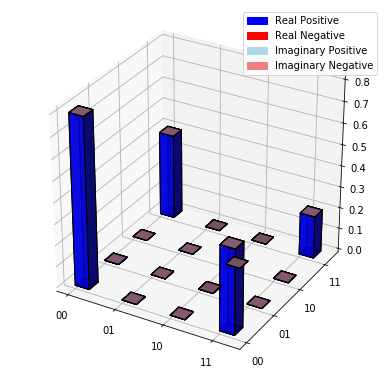

In [6]:
#visualize second density matrix
qg.visualize_density(rho1)

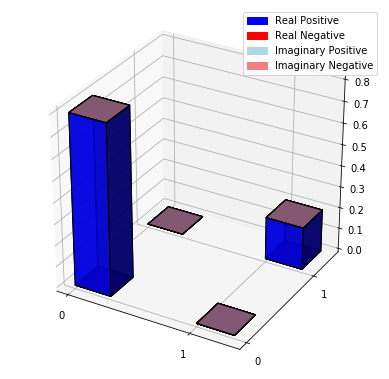

In [9]:
#visualize final density matrix
qg.visualize_density(rho2)

#### 1.3.2 Quantum Operation Form 1: Kraus Operator

The Isometry job was to add systems including the systems to be discarded, so we can descripe it in the form:
$$
V=\sum_{e}V_e \otimes |e \rangle
$$
where $ \{|e \rangle \}$ are the orthonormal basis of the system that will discarded, and $V_e$ makes the map in focus, we call it the Kraus operator.
\
But,
$$
I=V^{\dagger}V= ( \sum_{e_1}  V_{e_1}^{\dagger} \otimes \langle e_1 |) (\sum_{e_2}V_{e_2} \otimes |e_2 \rangle )
$$
then,
$$
I=\sum_{e}V_e^{\dagger}V_e
$$

for Quantum Operations:
$$
\rho \xrightarrow{operation} \mathcal{N}(\rho)=tr_E(V \rho V^{\dagger} )=tr_E(\sum_{e_1 , e_2} V_{e_1} \rho V_{e_2} \otimes |e_1 \rangle \langle e_2 |)
$$
then,
$$
\rho \xrightarrow{operation} \mathcal{N}(\rho)= \sum_{e_1 , e_2} V_{e_1} \rho V_{e_2}
$$

**Example**: Random unitary eveluotion: $\mathcal{N}(\rho)= \sum_{i} P_i U_{i} \rho U_{i}
$, it have kraus operators$\{\sqrt{P_i} U_i\}$.
\
we can implement this example in numbers using qiskit, assume that we will apply "X" with probability 0.3 and "I" with probability 0.7 (or the noise will apply, not us).

#### 1.3.3 Quantum Operation Form 3: Axiomatic approach (TPCP)

Axiomatic approach states that for any quantum operation $\mathcal{N}$ to be valid, it should has these properties:
\
1- Hermeticity preserving: $\mathcal{N}(Hermitian)= Hermitian^{\prime}$
\
2- Trace Preserving (**TP**): $tr(\mathcal{N}(\rho))=tr(\rho)$
\
3- Complete Positive preserving (**CP**): $\mathcal{N}(CP)= CP^{\prime}$
\
\
Note: when the system is Positive Semi-definite(PSD) and all of its subsystems are also PSD we call this system **Complete Positive**


### 1.4 Measurement

Measurement is the operation in which you transform your system $\rho$ to a system of classical probability distribution: $ \mathcal{N}(\rho)=\sum_{x=1}^{n}P_x |x \rangle \langle x| $ where $\{|1 \rangle, ..., |n \rangle \} $ are orthonormal basis.

as $P_x$ should depend on the state and the left hand side is linear in $\rho$, so we can write the probabilities $P_x$ as $P_x=c_{1_x} \rho_{11}+c_{2_x} \rho_{12}+...$ or:
$$
P_x=tr[\rho M_x]
$$

we call $\{M_x\}$ positive-operators valued measures **POVM**, and they have to satisfy conditions:
\
1- $1=tr(\rho)=tr(\mathcal{N} (\rho))=\sum_x P_x =\sum_x tr(\rho M_x)= tr(\rho \sum_x M_x)$
$$
\sum_x M_x =I
$$
\
2- $0 \leq P_x=tr(\rho M_x)$ but as $\rho \geq 0$ (PSD) , in addition, the last line should be valid for all $\rho$ then:
$$
M_x \geq 0 \;\;\; (PSD)
$$

### 1.5 Norms and Distances for Quantum States

**Definition**: **Norm** $\rVert \; . \rVert$: it can be considered as a measure of somethings (e.g. Vector) size, it should satisfy:
\
1- $ \rVert  c \bf{V} \rVert =|c| \rVert \; \bf{V} \rVert $, for $ c \in \mathbb{C} $
\
2-triangle inequality: $ \rVert  \bf{\nu} + \bf{\omega} \rVert \leq \rVert  \bf{\nu} \rVert +\rVert  \bf{\omega} \rVert $
\
3-$\rVert \bf{V} \rVert=0\;\;\;\; iff \;\; V=0$

one valid norm for vectors is $L^p$ norm: 
$$
for \;\; V \in \mathbb{C}^d \;,\;\; \lVert V \rVert _{L^p}= \left( \sum_i |V_i|^p \right) ^{1/p}
$$

and one valid norm for matrices is **Schatten P-norms**:
$$
for \;\; M \in \mathbb{C}^{m \times n} \;,\;\; \lVert M \rVert _{S^p}= \lVert SingularValues(M) \rVert _{L^p}
$$

for hermitian matrices Singular Values are just the absolute of eign values, and for density matrix it will give one in case of P=1.

**Definition**: **Trace Distance**: Trace distance is a measure of how far or how distinguishable are two states from each other.
$$
T(\rho,\sigma)=\frac{1}{2} \lVert \rho - \sigma \rVert _{S^1}
$$

Induction: From definition the trace distance should be:
$$
T(\rho,\sigma)= \underset{M}{max}\, \lvert tr(M \rho) - tr(M \sigma) \rvert=\underset{M}{max}\, \lvert tr(M (\rho- \sigma)) \rvert
$$

lets define $A \equiv \rho - \sigma $, as $\rho$ and  $\sigma$ are hermitian then A is also hermitian, then it can be expanded in its orthogonal eign vectors $\{v_i\}$ weighted to its eign values $\{\lambda_i \} (with spectral decomposition):

$$
A=\sum_j \lambda_j |v_j \rangle \langle v_j|=\underset{\lambda_j \geq 0}{\sum_j} \lambda_j |v_j \rangle \langle v_j| - \underset{\lambda_j < 0}{\sum_j} \lvert \lambda_j \rvert |v_j \rangle \langle v_j|
$$

so, the measure will maximize this expression will be a projector onto the positive eign space of A, then:
$$
T(\rho,\sigma)=\underset{\lambda_j > 0}{\sum_j} \lambda_j
$$

But note that: $tr(A)= \sum_j \lambda_j =tr( \rho -\sigma) =tr(\rho) -tr(\sigma)=1-1=0$ which mean that the sum over positive eign values is equal to the sum over magnitudes of negative eign values, then we can write:
$$
T(\rho,\sigma)=\frac{1}{2} \sum_j |\lambda_j|=\frac{1}{2} \lVert \rho - \sigma \rVert _{S^1}
$$

One can write a python code to find the trace distance for any given 2 states:

In [4]:
s0=[1,0]  #|0>
s1=[0,1]  #|1>

psi1=(1/np.sqrt(2))*(np.kron(s0,s0)+np.kron(s1,s1))  # 1/√2 |00>+|11>
psi2=(1/np.sqrt(2))*(np.kron(s0,s0)-np.kron(s1,s1))  # 1/√2 |00>-|11>
psi3=(1/np.sqrt(2))*(np.kron(s0,s0)+np.kron(s0,s1))  # 1/√2 |00>+|01>

t1=qg.trace_distance(psi1,psi2)
t2=qg.trace_distance(psi1,psi3)
t3=qg.trace_distance(psi2,psi3)
t4=qg.trace_distance(psi2,psi1)
t5=qg.trace_distance(psi1,psi1)
t6=qg.trace_distance(s0,s1)


print("the trace ditance between 1,2: ",t1 ,"\n 1,3: ",t2,"\n 2,3: ",t3,"\n 2,1: ",t4,"\n 1,1: ",t5,"\n |0>,|1>: ",t6)

the trace ditance between 1,2:  0.9999999999999998 
 1,3:  0.8660254037844378 
 2,3:  0.8660254037844378 
 2,1:  0.9999999999999998 
 1,1:  0 
 |0>,|1>:  1.0
